# Problem Statement

The goal of this project is to predict if the server will be hacked. 
The Dataset consists of a 'Incident ID' - a unique ID for each incident,<br> 'Date' - the date of incident occurence
as string, 15 anonymous features and the Target label - 'MULTIPLE_OFFENSE'.

In this problem an assumption is made that the data provided is from United States. This assumption will be
used in creation of additional features in the training and test sets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from datetime import datetime
import holidays

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier

In [2]:
path = '/Users/sandeep/Downloads/Dataset'

train_data = pd.read_csv(os.path.join(path, 'Train.csv'))
test_data = pd.read_csv(os.path.join(path, 'Test.csv'))

In [3]:
train_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
train_data.shape

(23856, 18)

In [5]:
# Browsing through the data. Looking if any columns have Null values.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [6]:
train_data.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [7]:
test_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
INCIDENT_ID    15903 non-null object
DATE           15903 non-null object
X_1            15903 non-null int64
X_2            15903 non-null int64
X_3            15903 non-null int64
X_4            15903 non-null int64
X_5            15903 non-null int64
X_6            15903 non-null int64
X_7            15903 non-null int64
X_8            15903 non-null int64
X_9            15903 non-null int64
X_10           15903 non-null int64
X_11           15903 non-null int64
X_12           15776 non-null float64
X_13           15903 non-null int64
X_14           15903 non-null int64
X_15           15903 non-null int64
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


In [9]:
test_data.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

## 1. Exploratory Data Analysis

No. of instances of hack : 22788

No. of instances of no hack : 1068




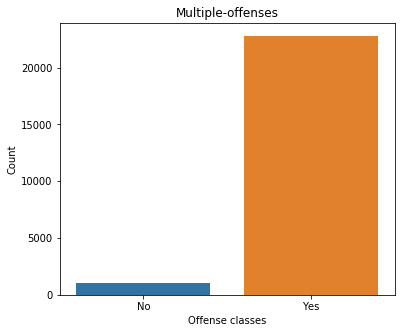

In [10]:
# We try to find the imbalance in the classes.
y, n = train_data['MULTIPLE_OFFENSE'].value_counts()

print('No. of instances of hack : {}\n'.format(y))
print('No. of instances of no hack : {}\n\n'.format(n))
plt.figure(figsize=(6,5))
sns.countplot(train_data['MULTIPLE_OFFENSE'], label='Count')
plt.title('Multiple-offenses', fontsize=12)
plt.xticks((0,1),['No', 'Yes'])
plt.xlabel('Offense classes', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

 @ This plot indicates a highly imbalanced class with majority class being [1 : Yes]

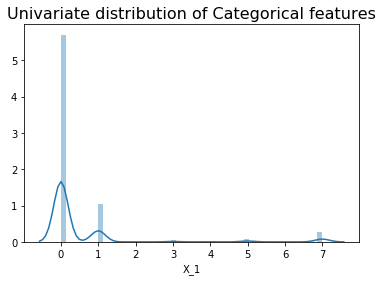

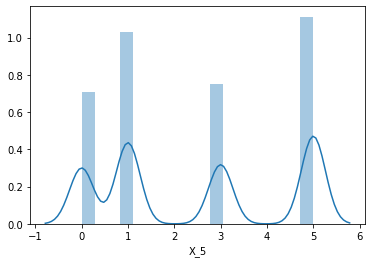

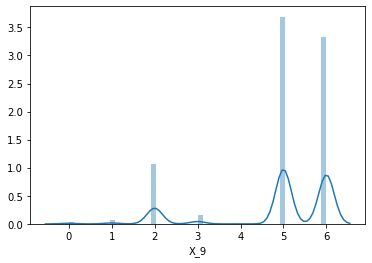

In [11]:
def getDiscreteFeatures():
    data = train_data.copy()
    data.drop('MULTIPLE_OFFENSE',axis=1, inplace=True)
    
    discrete_features = [feature for feature in data.columns if len(data[feature].unique()) <= 8]
    return discrete_features

discrete_features = getDiscreteFeatures()


plt.title('Univariate distribution of Categorical features', fontsize=16)
for j in range(3):
        sns.distplot(train_data[discrete_features[j]])
        plt.show()
        

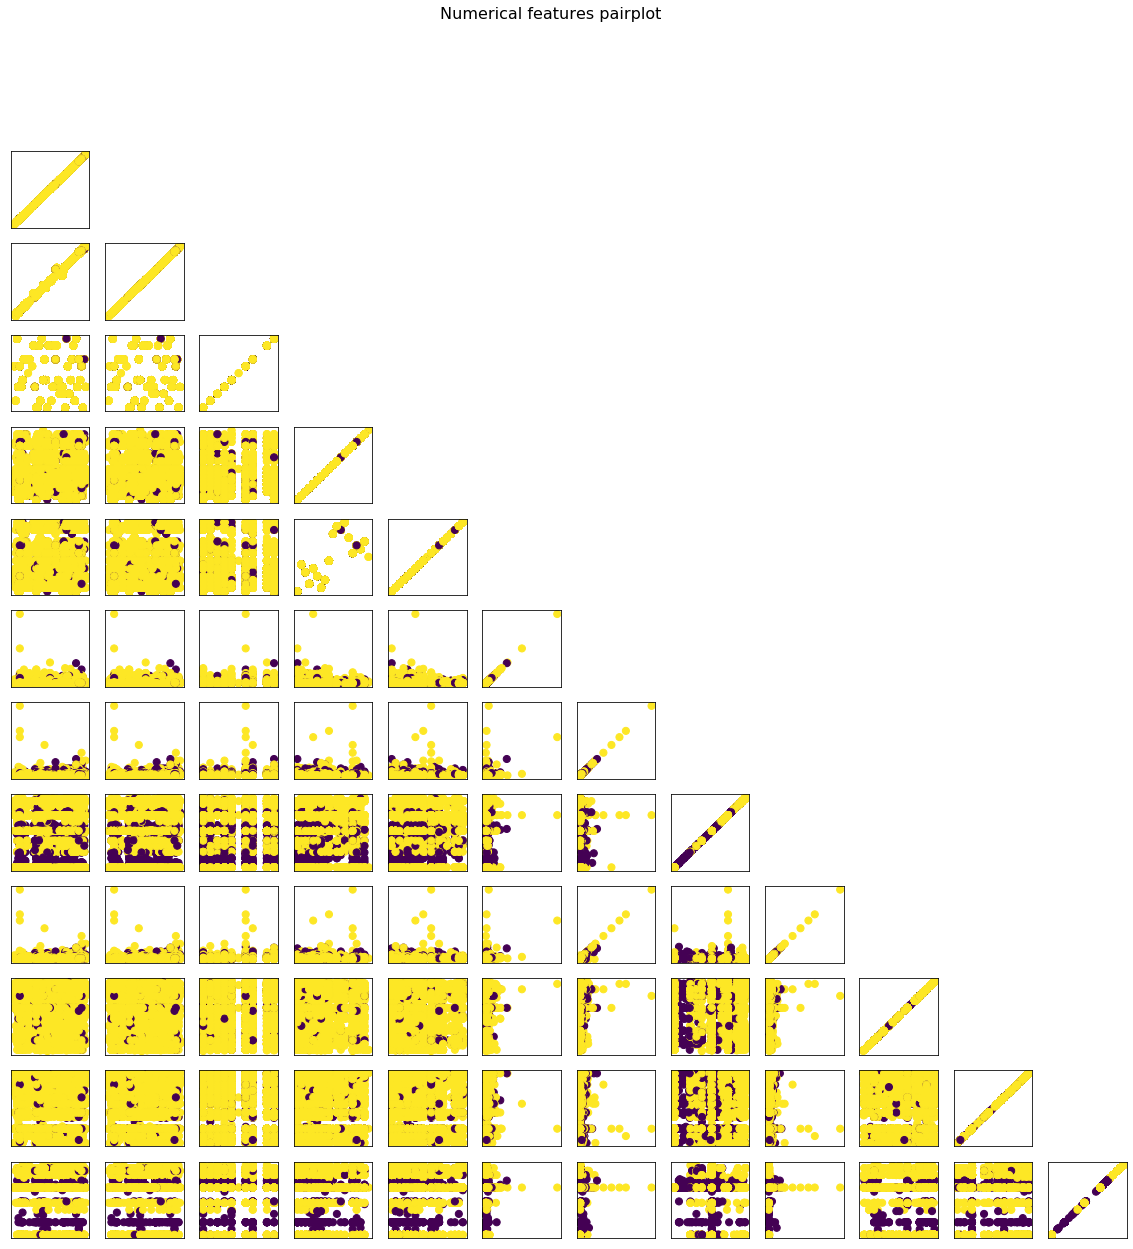

In [12]:
# We will look at relationship between each numerical feature by plotting scatter plot

def getNumericalFeatures():
    data = train_data.copy()
    data.drop(['INCIDENT_ID', 'DATE'], axis=1, inplace=True)
    numerical_features = [features for features in data.columns if len(data[features].unique()) >8]
    return numerical_features

numerical_features = getNumericalFeatures()

num_data = train_data[numerical_features]

fig, ax = plt.subplots(12, 12, figsize=(20,20))
plt.suptitle('Numerical features pairplot', fontsize=16)

for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        ax[i,j].scatter(num_data.iloc[:, j], num_data.iloc[:,i], c =train_data['MULTIPLE_OFFENSE'],s=50)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        if j > i:
            ax[i,j].set_visible(False)

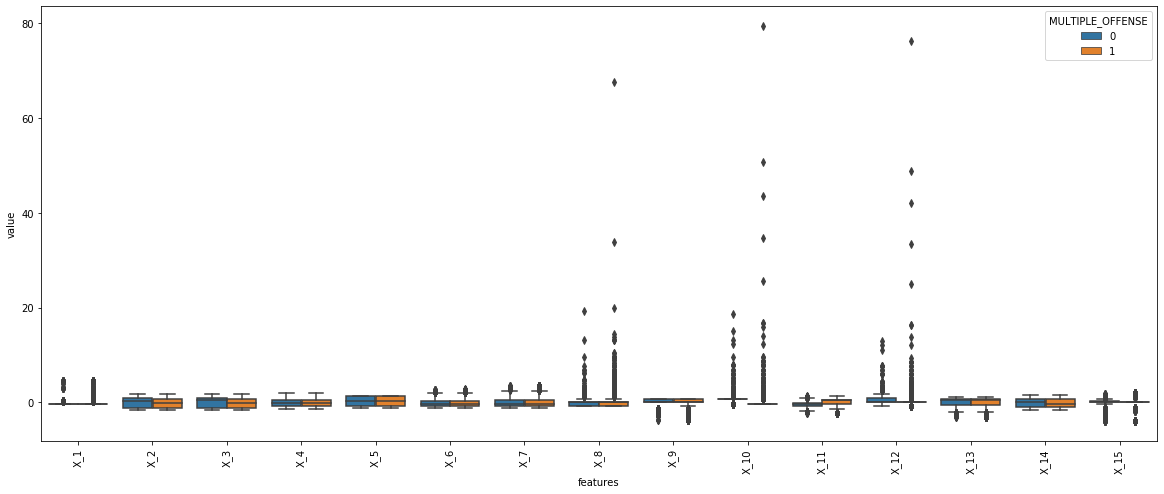

In [13]:
# We plot boxplot to detect outlier (if any) and also look at similar features
features = [features for features in train_data.columns if train_data[features].dtype != 'O' 
                                                          and features != 'MULTIPLE_OFFENSE']

target = train_data['MULTIPLE_OFFENSE'].copy()
data = train_data[features].copy()

scaler = StandardScaler()
data_stdzd = pd.DataFrame(scaler.fit_transform(data),index=data.index, columns=data.columns)

# Using only the first 10 features from the dataset
dataframe = pd.concat([target, data_stdzd], axis=1)
dataframe = pd.melt(dataframe, id_vars='MULTIPLE_OFFENSE', var_name='features', value_name='value')

plt.figure(figsize=(20,8))
sns.boxplot(x='features', y='value', hue='MULTIPLE_OFFENSE', data=dataframe)
plt.xticks(rotation=90)
plt.show()

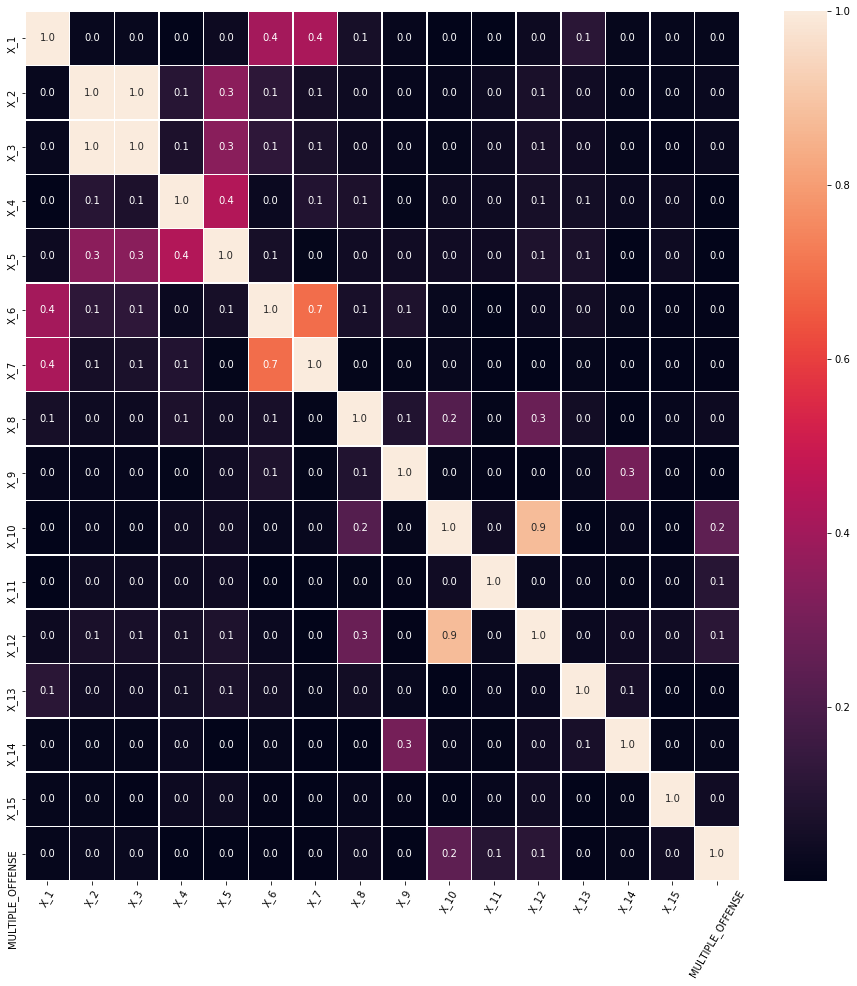

In [14]:
# We determine a correlation matrix and plot a heat-map to find correlation between different features.
#This will be used for feature selection

fig, ax = plt.subplots(figsize=(16,16))
h1 = sns.heatmap(train_data.loc[:, 'X_1':].corr().abs(), annot=True, linewidths=0.5, fmt='.1f', ax=ax)
plt.xticks(fontsize=10, rotation=60)
plt.yticks(fontsize=10)
plt.show()

@ From the heatmap we observe that X_2 and X_3 have similar correlations and both are correlated. X_10 and <br> 
X_12 are also correlated. Similarly X_6 and X_7 are also correlated.

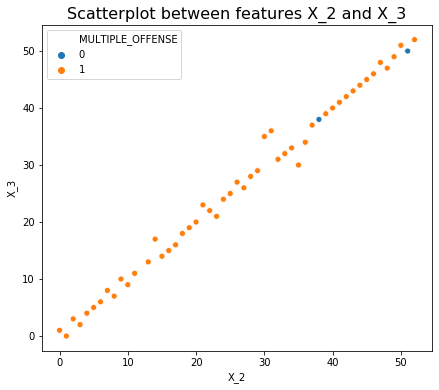

In [15]:
plt.figure(figsize=(7,6))
sns.scatterplot('X_2', 'X_3', hue=train_data['MULTIPLE_OFFENSE'], data = train_data)
plt.title('Scatterplot between features X_2 and X_3', fontsize=16)
plt.show()

@ From boxplot and scatterplot we conclude X_2 and X_3 are almost similar. We will drop column X_2. Similarly 
X_6 and X_7 also look similar. Hence we drop X_6 since X_6 has more correlations than X_7. 
@ We also drop X_10 since its correlated to X_12 and also has higher number of correlations with other features as compared to X_12.
<br> @ We find that the variables are not highly correlated to the target variable 'MULTIPLE-OFFENSE'. If X_10 is removed, then the remaining correlations are insignificant.

## 2. Preprocessing

In [16]:
# We drop features based on our understanding from boxplot and heatmap
dropped_features = ['X_2', 'X_6', 'X_10']
train_data.drop(dropped_features, axis=1, inplace=True)
test_data.drop(dropped_features, axis=1, inplace=True)

In [17]:
# filling null values in the column with median value
train_data['X_12'].fillna(train_data['X_12'].median(),inplace=True)
test_data['X_12'].fillna(test_data['X_12'].median(), inplace=True)

@ We made an assumption that the data provided was from US so that we can create a binary encoded feature 
called 'is_holiday' based on<br> US holidays in the given date range. We also create another binary encoded feature called 'is_weekend'.

In [18]:
h_day = []
for days in holidays.UnitedStates(years=range(1991, 2019)).items():
    h_day.append(str(days[0]))
    

def holiday_verification(date):
    var = pd.to_datetime(date)
    if str(var)[0:10] in h_day:
        return 1
    else:
        return 0
    
train_data['is_holiday'] = train_data.apply(lambda x: holiday_verification(x['DATE']), axis=1)
test_data['is_holiday'] = test_data.apply(lambda x: holiday_verification(x['DATE']), axis=1)

In [19]:
train_data['is_weekend'] = 0
train_data.loc[pd.to_datetime(train_data['DATE']).dt.dayofweek.isin([5,6]), 'is_weekend'] = 1

test_data['is_weekend'] = 0
test_data.loc[pd.to_datetime(train_data['DATE']).dt.dayofweek.isin([5,6]), 'is_weekend'] = 1

In [20]:
train_data.set_index('INCIDENT_ID', inplace=True)
test_data.set_index('INCIDENT_ID', inplace=True)

## 3. Model building

In [21]:
y = train_data['MULTIPLE_OFFENSE']
X = train_data.drop(['DATE', 'MULTIPLE_OFFENSE'], axis=1)

X_test = test_data.drop('DATE' ,axis=1)

In [22]:
scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_norm_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

## 4. Model Evaluation

In [24]:
# model evaluation
def evaluate_model(X, y, model):
    fold = RepeatedStratifiedKFold(n_splits=10)
    score = cross_val_score(model, X, y, scoring='recall', cv=fold, n_jobs=-1)
    
    return score

In [25]:
model1 = SVC(class_weight='balanced')
model2 = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
model3 = GradientBoostingClassifier()
model4 = XGBClassifier(scale_pos_weight=0.0468, n_jobs=-1)

In [26]:
score1 = evaluate_model(X_norm, y, model1) # Support vector machine 

In [27]:
score2 = evaluate_model(X, y, model2) # Random forest

In [28]:
score3 = evaluate_model(X, y, model3) # Gradient boosted Decision tree

In [29]:
score4 = evaluate_model(X, y, model4)  # XGBoost

In [30]:
scores = [score1, score2, score3, score4]

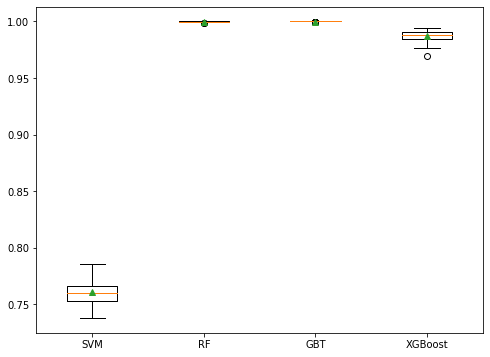

In [32]:
plt.figure(figsize=(8,6))
plt.boxplot(scores, labels = ['SVM', 'RF', 'GBT', 'XGBoost'], showmeans=True)
plt.show()

The Cross Validation score of XGBoost seems more or less acceptable. Hence XGBoost is selected as the model.

In [33]:
# checking the recall score of the XGBClassifier. 
#Note: scale_pos_weight decides the balancing of the classes in the case of an imbalanced target values.

xgb = XGBClassifier(scale_pos_weight=0.0468, n_jobs= -1)
xgb.fit(X_train, y_train)

predict_y = xgb.predict(X_val)
print('Recall score of XGB Classifier : {:.3f}\n'.format(recall_score(y_val, predict_y)))

Recall score of XGB Classifier : 0.983



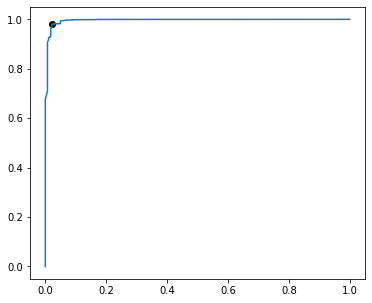

Best threshold is 0.535


In [34]:
# Deciding the optimal threshold for predicting classes in the test set
fpr, tpr, thresholds = roc_curve(y_val, xgb.predict_proba(X_val)[:,1])

gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], color='Black', marker='o')
plt.show()

print('Best threshold is {:.3f}'.format(thresholds[ix]))

## 5. Final Model

In [124]:
# Writing a function to create our desired model for Hack-NoHack detection
def HackOrNot(test_data):
    path = '/Users/sandeep/Downloads/Dataset'
    train_data = pd.read_csv(os.path.join(path, 'Train.csv'))
    
    # preprocessing
    dropped_features = ['X_2', 'X_6', 'X_10']
    train_data.drop(dropped_features, axis=1, inplace=True)
    test_data.drop(dropped_features, axis=1, inplace=True)
    train_data['X_12'].fillna(train_data['X_12'].median(),inplace=True)
    test_data['X_12'].fillna(test_data['X_12'].median(), inplace=True)
    
    # adding feature 'is_holiday'
    h_day = []
    for days in holidays.UnitedStates(years=range(1991, 2019)).items():
        h_day.append(str(days[0]))
    

    def holiday_verification(date):  
        var = pd.to_datetime(date)
        if str(var)[0:10] in h_day:
            return 1
        else:
            return 0
    
    train_data['is_holiday'] = train_data.apply(lambda x: holiday_verification(x['DATE']), axis=1)
    test_data['is_holiday'] = test_data.apply(lambda x: holiday_verification(x['DATE']), axis=1)
    
    # adding feature 'is_weekend'
    train_data['is_weekend'] = 0
    train_data.loc[pd.to_datetime(train_data['DATE']).dt.dayofweek.isin([5,6]), 'is_weekend'] = 1
    test_data['is_weekend'] = 0
    test_data.loc[pd.to_datetime(train_data['DATE']).dt.dayofweek.isin([5,6]), 'is_weekend'] = 1  
    train_data.set_index('INCIDENT_ID', inplace=True)
    test_data.set_index('INCIDENT_ID', inplace=True)
    
    # Model building
    y = train_data['MULTIPLE_OFFENSE']
    X = train_data.drop(['DATE', 'MULTIPLE_OFFENSE'], axis=1)
    X_test = test_data.drop('DATE' ,axis=1)
    
    xgb = XGBClassifier(scale_pos_weight=0.0468, n_jobs= -1)
    xgb.fit(X_train, y_train)
    predict_y = xgb.predict(X_test)
    
    threshold = 0.535  
    hacked = []
    
    for i in range(len(X_test)):
        if xgb.predict_proba(X_test)[:, 1][i] > threshold:
            hacked.append([X_test.index[i], 1])
        else:
            hacked.append([X_test.index[i], 0])
    
    submission_df = pd.DataFrame(hacked, columns= ['INCIDENT_ID', 'MULTIPLE_OFFENSE'])
   
    return submission_df
            

In [125]:
test_data = pd.read_csv(os.path.join(path, 'Test.csv'))
submission_df = HackOrNot(test_data)

In [126]:
submission_df.to_csv('Submission.csv', index=False)